<a href="https://colab.research.google.com/github/bd37573/thesis/blob/main/IoT_Bot_Detection_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, HTML

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
display(HTML("""
<style>
 .messagebox{
     border-radius: 2px;
     padding: 1.25em 1.5em;
     border: 1px solid;
 }
.messagelightgreen{
     border-color: hsl(164deg 95% 38%);
     color: rgb(5 139 102);
     background-color: rgb(236 255 250);
 }
 .messagelightgreen b{
     color:rgb(139 77 5);
 }
 .messagebrown{
     border-color: hsl(35deg 96% 62%);
    color: rgb(143 84 4);
    background-color: rgb(255 245 234);
 }
 .messagebrown b{
     color: rgb(5 139 102);
 }
</style>"""))

In [4]:
import pandas as pd

In [5]:
pd.set_option('display.max_columns', 9999999999)

In [6]:
import numpy as np

In [7]:
import plotly.express as px

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

In [11]:
import matplotlib as mpl

In [12]:
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

In [13]:
%matplotlib inline

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
from sklearn import preprocessing, model_selection, metrics, feature_selection

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
from sklearn.model_selection import cross_val_predict

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import Dense, Activation,Conv1D,LSTM,Flatten

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
import itertools

In [31]:
import glob

In [32]:
import os

In [33]:
mirai_df_list = []

In [34]:
for file in glob.glob("drive/MyDrive/Dataset/mirai/*.csv"):
    tmp_df = pd.read_csv(file)
    tmp_df["target"] = "mirai-"+ os.path.splitext(os.path.basename(file))[0]
    mirai_df_list.append(tmp_df)

In [35]:
mirai_df_list[0].head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,HH_L3_magnitude,HH_L3_radius,HH_L3_covariance,HH_L3_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius,HH_L1_covariance,HH_L1_pcc,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_L0.01_weight,HH_L0.01_mean,HH_L0.01_std,HH_L0.01_magnitude,HH_L0.01_radius,HH_L0.01_covariance,HH_L0.01_pcc,HH_jit_L5_weight,HH_jit_L5_mean,HH_jit_L5_variance,HH_jit_L3_weight,HH_jit_L3_mean,HH_jit_L3_variance,HH_jit_L1_weight,HH_jit_L1_mean,HH_jit_L1_variance,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.000000,1.507658e+09,0.000000e+00,1.000000,1.507658e+09,0.000000e+00,1.000000,1.507658e+09,0.000000e+00,1.000000,1.507658e+09,0.000000e+00,1.000000,1.507658e+09,0.000000e+00,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai-ack
1,1.996585,566.0,5.820766e-11,1.997950,566.0,5.820766e-11,1.999316,566.0,0.000000e+00,1.999932,566.0,1.746230e-10,1.999993,566.0,1.164153e-10,1.996585,566.0,5.820766e-11,1.997950,566.0,5.820766e-11,1.999316,566.0,0.000000e+00,1.999932,566.0,1.746230e-10,1.999993,566.0,1.164153e-10,1.996585,566.0,0.000008,566.0,5.820766e-11,0.0,0.0,1.997950,566.0,0.000008,566.0,5.820766e-11,0.0,0.0,1.999316,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.999932,566.0,0.000013,566.0,1.746230e-10,0.0,0.0,1.999993,566.0,0.000011,566.0,1.164153e-10,0.0,0.0,1.996585,7.525396e+08,5.682564e+17,1.997950,7.530553e+08,5.682575e+17,1.999316,7.535711e+08,5.682580e+17,1.999932,7.538032e+08,5.682581e+17,1.999993,7.538264e+08,5.682581e+17,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai-ack
2,2.958989,566.0,0.000000e+00,2.975291,566.0,5.820766e-11,2.991729,566.0,5.820766e-11,2.999171,566.0,0.000000e+00,2.999917,566.0,5.820766e-11,2.958989,566.0,0.000000e+00,2.975291,566.0,5.820766e-11,2.991729,566.0,5.820766e-11,2.999171,566.0,0.000000e+00,2.999917,566.0,5.820766e-11,2.958989,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,2.975291,566.0,0.000008,566.0,5.820766e-11,0.0,0.0,2.991729,566.0,0.000008,566.0,5.820766e-11,0.0,0.0,2.999171,566.0,0.0

In [36]:
gafgyt_df_list = []

In [37]:
for file in glob.glob("drive/MyDrive/Dataset/gafgyt/*.csv"):
    tmp_df = pd.read_csv(file)
    tmp_df["target"] = "gafgyt-"+ os.path.splitext(os.path.basename(file))[0]
    gafgyt_df_list.append(tmp_df)

In [38]:
gafgyt_df_list[0].head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,HH_L3_magnitude,HH_L3_radius,HH_L3_covariance,HH_L3_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius,HH_L1_covariance,HH_L1_pcc,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_L0.01_weight,HH_L0.01_mean,HH_L0.01_std,HH_L0.01_magnitude,HH_L0.01_radius,HH_L0.01_covariance,HH_L0.01_pcc,HH_jit_L5_weight,HH_jit_L5_mean,HH_jit_L5_variance,HH_jit_L3_weight,HH_jit_L3_mean,HH_jit_L3_variance,HH_jit_L1_weight,HH_jit_L1_mean,HH_jit_L1_variance,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,98.000000,0.000000e+00,0.0,0.0,1.000000,98.000000,0.000000,98.000000,0.000000,0.0,0.0,1.000000,98.00000,0.000000,98.000000,0.000000,0.0,0.0,1.000000,98.000000,0.000000,98.000000,0.000000e+00,0.0,0.0,1.000000,98.000000,0.000000,98.000000,0.000000e+00,0.0,0.0,1.000000,1.505914e+09,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.000000,98.000000,0.000000,98.000000,0.000000e+00,0.0,0.0,1.000000,98.000000,0.000000,98.000000,0.000000,0.0,0.0,1.000000,98.00000,0.000000,98.000000,0.000000,0.0,0.0,1.000000,98.000000,0.000000,98.000000,0.000000e+00,0.0,0.0,1.000000,98.000000,0.000000,98.000000,0.000000e+00,0.0,0.0,gafgyt-tcp
1,1.028978,98.000000,1.818989e-12,1.119465,98.000000,0.000000,1.492508,98.000000,0.000000,1.931625,98.000000,1.818989e-12,1.992943,98.000000,1.818989e-12,1.028978,98.000000,1.818989e-12,1.119465,98.000000,0.000000,1.492508,98.000000,0.000000,1.931625,98.000000,1.818989e-12,1.992943,98.000000,1.818989e-12,1.028978,98.000000,0.000001,138.592929,1.818989e-12,0.0,0.0,1.119465,98.000000,0.000000,138.592929,0.000000,0.0,0.0,1.492508,98.00000,0.000000,138.592929,0.000000,0.0,0.0,1.931625,98.000000,0.000001,138.592929,1.818989e-12,0.0,0.0,1.992943,98.000000,0.000001,138.592929,1.818989e-12,0.0,0.0,1.028978,4.240910e+07,6.206590e+16,1.119465,1.607047e+08,2.161814e+17,1.492508,4.969314e+08,5.013949e+17,1.931625,7.263040e+08,5.662335e+17,1.992943,7.502904e+08,5.669368e+17,1.028978,98.000000,0.000001,138.592929,1.818989e-12,0.0,0.0,1.119465,98.000000,0.000000,138.592929,0.000000,0.0,0.0,1.492508,98.00000,0.000000,138.592929,0.000000,0.0,0.0,1.931625,98.000000,0.000001,138.592929,1.818989e-12,0.0,0.0,1.992943,98.000000,0.000001,138.592929,1.818989e-12,0.0,0.0,gafgyt-tcp
2,1.361630,74.498759,1.997314e+02,1.597758,77.971939,239.774725,2.210844,83.525

In [39]:
benign_df = pd.read_csv("drive/MyDrive/Dataset/benign_traffic.csv")
benign_df["target"] = "benign"

In [40]:
gafgyt_df_list.append(benign_df)

In [41]:
df_list = mirai_df_list + gafgyt_df_list

In [42]:
df = pd.concat(df_list)

In [43]:
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,HH_L3_magnitude,HH_L3_radius,HH_L3_covariance,HH_L3_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius,HH_L1_covariance,HH_L1_pcc,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_L0.01_weight,HH_L0.01_mean,HH_L0.01_std,HH_L0.01_magnitude,HH_L0.01_radius,HH_L0.01_covariance,HH_L0.01_pcc,HH_jit_L5_weight,HH_jit_L5_mean,HH_jit_L5_variance,HH_jit_L3_weight,HH_jit_L3_mean,HH_jit_L3_variance,HH_jit_L1_weight,HH_jit_L1_mean,HH_jit_L1_variance,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.000000,1.507658e+09,0.000000e+00,1.000000,1.507658e+09,0.000000e+00,1.000000,1.507658e+09,0.000000e+00,1.000000,1.507658e+09,0.000000e+00,1.000000,1.507658e+09,0.000000e+00,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai-ack
1,1.996585,566.0,5.820766e-11,1.997950,566.0,5.820766e-11,1.999316,566.0,0.000000e+00,1.999932,566.0,1.746230e-10,1.999993,566.0,1.164153e-10,1.996585,566.0,5.820766e-11,1.997950,566.0,5.820766e-11,1.999316,566.0,0.000000e+00,1.999932,566.0,1.746230e-10,1.999993,566.0,1.164153e-10,1.996585,566.0,0.000008,566.0,5.820766e-11,0.0,0.0,1.997950,566.0,0.000008,566.0,5.820766e-11,0.0,0.0,1.999316,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,1.999932,566.0,0.000013,566.0,1.746230e-10,0.0,0.0,1.999993,566.0,0.000011,566.0,1.164153e-10,0.0,0.0,1.996585,7.525396e+08,5.682564e+17,1.997950,7.530553e+08,5.682575e+17,1.999316,7.535711e+08,5.682580e+17,1.999932,7.538032e+08,5.682581e+17,1.999993,7.538264e+08,5.682581e+17,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai-ack
2,2.958989,566.0,0.000000e+00,2.975291,566.0,5.820766e-11,2.991729,566.0,5.820766e-11,2.999171,566.0,0.000000e+00,2.999917,566.0,5.820766e-11,2.958989,566.0,0.000000e+00,2.975291,566.0,5.820766e-11,2.991729,566.0,5.820766e-11,2.999171,566.0,0.000000e+00,2.999917,566.0,5.820766e-11,2.958989,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,2.975291,566.0,0.000008,566.0,5.820766e-11,0.0,0.0,2.991729,566.0,0.000008,566.0,5.820766e-11,0.0,0.0,2.999171,566.0,0.0

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018298 entries, 0 to 49547
Columns: 116 entries, MI_dir_L5_weight to target
dtypes: float64(115), object(1)
memory usage: 909.0+ MB


In [45]:
df.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,HH_L3_magnitude,HH_L3_radius,HH_L3_covariance,HH_L3_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius,HH_L1_covariance,HH_L1_pcc,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_L0.01_weight,HH_L0.01_mean,HH_L0.01_std,HH_L0.01_magnitude,HH_L0.01_radius,HH_L0.01_covariance,HH_L0.01_pcc,HH_jit_L5_weight,HH_jit_L5_mean,HH_jit_L5_variance,HH_jit_L3_weight,HH_jit_L3_mean,HH_jit_L3_variance,HH_jit_L1_weight,HH_jit_L1_mean,HH_jit_L1_variance,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06,1.018298e+06
mean,9.479704e+01,1.927187e+02,1.970133e+04,1.502972e+02,1.934838e+02,2.200175e+04,4.328257e+02,1.947330e+02,2.348970e+04,4.118614e+03,1.954308e+02,2.364051e+04,2.631387e+04,1.953742e+02,2.363428e+04,9.479704e+01,1.927187e+02,1.970133e+04,1.502972e+02,1.934838e+02,2.200175e+04,4.328257e+02,1.947330e+02,2.348970e+04,4.118614e+03,1.954307e+02,2.364051e+04,2.631387e+04,1.953741e+02,2.363428e+04,4.432024e+01,1.954040e+02,2.334476e-01,1.993110e+02,1.403998e+01,2.963847e-02,2.901417e-05,7.226493e+01,1.954031e+02,3.038216e-01,1.993106e+02,1.437177e+01,3.984167e-02,8.128462e-05,2.114306e+02,1.954089e+02,5.747969e-01,1.993187e+02,1.728301e+01,7.901944e-02,4.467999e-04,1.954950e+03,1.954566e+02,1.531800e+00,1.993804e+02,6.4

In [46]:
ds_shape = df.shape

In [47]:
display(HTML("<h6 class='messagebox messagelightgreen'>No of Rows Available in Dataset <b>{0}</b></h6>".format(ds_shape[0])))
display(HTML("<h6 class='messagebox messagelightgreen'>No of Columns Available in Dataset <b>{0}</b></h6>".format(ds_shape[1])))

In [48]:
target_counts = df["target"].value_counts()

In [49]:
target_counts

mirai-udp         237665
mirai-syn         122573
mirai-scan        107685
gafgyt-udp        105874
mirai-ack         102195
gafgyt-tcp         92141
mirai-udpplain     81982
gafgyt-combo       59718
benign             49548
gafgyt-scan        29849
gafgyt-junk        29068
Name: target, dtype: int64

In [50]:
def display_bar_chart(data, xvalues, yvalues, graph_title, xtitle, ytitle):
    fig = px.bar(data, x=xvalues, y=yvalues, color=xvalues)
    fig.update_layout(title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    fig.show()

In [51]:
display_bar_chart(target_counts, target_counts.index, target_counts.values, "Target wise count", "IoT BoT Name", "No of Samples")

In [52]:
df.isnull().sum().sort_values()

MI_dir_L5_weight     0
HpHp_L5_radius       0
HpHp_L5_magnitude    0
HpHp_L5_std          0
HpHp_L5_mean         0
                    ..
HH_L5_std            0
HH_L5_mean           0
HH_L5_weight         0
HH_L3_covariance     0
target               0
Length: 116, dtype: int64

In [53]:
display(HTML("<h6 class='messagebox messagebrown'><b>No</b> Missing Values are Available in Dataset</h6>"))

In [54]:
duplicated_rows = df.duplicated().sum()

In [55]:
display(HTML("<h6 class='messagebox messagebrown'>There are {0} Duplicated Rows Available in Dataset</h6>".format(duplicated_rows)))

In [56]:
df.drop_duplicates(inplace=True)

In [57]:
duplicated_rows = df.duplicated().sum()

In [58]:
display(HTML("<h6 class='messagebox messagebrown'>There are {0} Duplicated Rows Available in Dataset</h6>".format(duplicated_rows)))

In [59]:
df["target"].replace(regex=r'^mirai-[a-z]*', value='mirai', inplace=True)

In [60]:
df["target"].replace(regex=r'^gafgyt-[a-z]*', value='gafgyt', inplace=True)

In [61]:
target_counts = df["target"].value_counts()

In [62]:
target_counts

mirai     652100
gafgyt    304044
benign     40395
Name: target, dtype: int64

In [63]:
display_bar_chart(target_counts, target_counts.index, target_counts.values, "Target wise count", "IoT BoT Name", "No of Samples")

In [64]:
labelencoder = LabelEncoder()

In [65]:
df['target'] = labelencoder.fit_transform(df['target'])

In [66]:
y = df["target"]

In [67]:
X = df.drop(["target"], axis=1)

In [68]:
from collections import Counter

In [69]:
from imblearn.over_sampling import SMOTE
SMOTE =SMOTE()

X_res, y_res = SMOTE.fit_resample(X,y)
print('After %s' % Counter(y_res))

After Counter({2: 652100, 1: 652100, 0: 652100})


In [70]:
y_res.value_counts()

2    652100
1    652100
0    652100
Name: target, dtype: int64

In [71]:
display_bar_chart(y_res.value_counts(), y_res.value_counts().index, y_res.value_counts().values, "Target wise count", "IoT BoT Name", "No of Samples")

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
scaler.fit(X)

MinMaxScaler()

In [75]:
X = scaler.transform(X)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
from sklearn.feature_selection import SelectKBest

In [79]:
from sklearn.feature_selection import chi2

In [80]:
select_feature = SelectKBest(chi2, k=5).fit(X, y)

In [81]:
print('Score list:', select_feature.scores_)

Score list: [4.23581356e+04 7.52589517e+04 5.95514095e+04 4.75886890e+04
 7.95912094e+04 6.68049279e+04 6.77642247e+04 9.72839254e+04
 7.13452619e+04 1.00466353e+05 1.25490751e+05 9.02707987e+04
 1.39227155e+05 1.25805158e+05 1.03048406e+05 4.23581356e+04
 7.52589517e+04 5.95514095e+04 4.75886890e+04 7.95912094e+04
 6.68049279e+04 6.77642246e+04 9.72839273e+04 7.13452618e+04
 1.00466352e+05 1.25490811e+05 9.02707969e+04 1.39227154e+05
 1.25805322e+05 1.03048403e+05 6.18756519e+03 7.49665148e+04
 1.77645141e+02 4.02619228e+04 7.07898309e+00 4.99929832e-04
 3.06367914e-03 7.58279810e+03 7.49689627e+04 2.29212220e+02
 4.02622384e+04 7.29138266e+00 8.66016440e-04 2.00036609e-02
 9.41649122e+03 7.49580217e+04 4.90629929e+02 4.02597694e+04
 1.40731508e+01 7.03320612e-04 9.26307651e-01 1.20152647e+04
 7.48588159e+04 2.28024604e+03 4.24880270e+04 1.79654829e+02
 1.26365021e-03 4.11409131e+01 4.62192336e+04 7.49344258e+04
 2.67397595e+03 4.61365054e+04 2.94091510e+02 3.87907171e-02
 1.79488915e

In [82]:
x_train.shape

(697577, 115)

In [83]:
fs = SelectKBest(chi2, k=20)

In [84]:
fs.fit(x_train, y_train)

SelectKBest(k=20, score_func=<function chi2 at 0x7fd3cbaecb90>)

In [85]:
x_train_fs = fs.transform(x_train)

In [86]:
x_train_fs.shape

(697577, 20)

In [87]:
x_test_fs = fs.transform(x_test)

In [88]:
x_test_fs.shape

(298962, 20)

In [89]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 29665.029554
Feature 1: 52696.297569
Feature 2: 41658.235032
Feature 3: 33345.988476
Feature 4: 55721.132796
Feature 5: 46746.512034
Feature 6: 47494.387211
Feature 7: 68095.636943
Feature 8: 49939.615432
Feature 9: 70424.940162
Feature 10: 87832.404774
Feature 11: 63179.021716
Feature 12: 97575.085725
Feature 13: 88052.843295
Feature 14: 72120.119340
Feature 15: 29665.029554
Feature 16: 52696.297569
Feature 17: 41658.235032
Feature 18: 33345.988476
Feature 19: 55721.132797
Feature 20: 46746.512034
Feature 21: 47494.387074
Feature 22: 68095.638921
Feature 23: 49939.615306
Feature 24: 70424.939284
Feature 25: 87832.464595
Feature 26: 63179.019934
Feature 27: 97575.085196
Feature 28: 88053.006915
Feature 29: 72120.116103
Feature 30: 4348.549244
Feature 31: 52486.878600
Feature 32: 125.741679
Feature 33: 28180.149124
Feature 34: 4.828688
Feature 35: 0.000643
Feature 36: 0.001460
Feature 37: 5329.182734
Feature 38: 52488.241289
Feature 39: 163.017754
Feature 40: 28180.221506
Fea

In [90]:
model = LogisticRegression()

In [91]:
model.fit(x_train_fs, y_train)

LogisticRegression()

In [92]:
yhat = model.predict(x_test_fs)

In [93]:
lr_accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (lr_accuracy*100))

Accuracy: 95.094


In [94]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12005
           1       0.92      0.92      0.92     91503
           2       0.96      0.96      0.96    195454

    accuracy                           0.95    298962
   macro avg       0.96      0.96      0.96    298962
weighted avg       0.95      0.95      0.95    298962



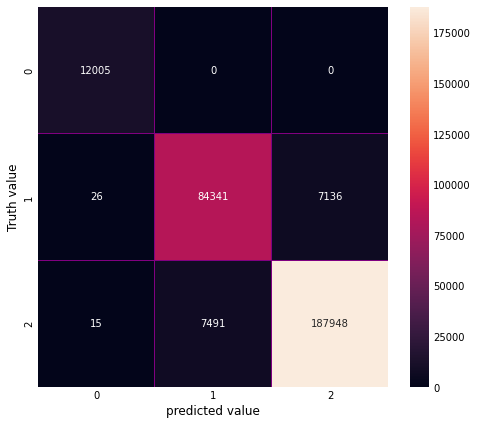

In [95]:
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=(7,7))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

In [96]:
rf = RandomForestClassifier()

In [97]:
n_estimators = [1,2,4,8,16,32,100,200]

In [98]:
for item in n_estimators:
  rf = RandomForestClassifier(n_estimators=item)
  rf.fit(x_train_fs, y_train)
  yhat = rf.predict(x_test_fs)
  rf_accuracy = accuracy_score(y_test, yhat)
  print('Accuracy: %.3f' % (rf_accuracy*100))

Accuracy: 99.998
Accuracy: 99.995
Accuracy: 99.998
Accuracy: 99.998
Accuracy: 99.999
Accuracy: 99.999
Accuracy: 99.998
Accuracy: 99.998


In [99]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12005
           1       1.00      1.00      1.00     91503
           2       1.00      1.00      1.00    195454

    accuracy                           1.00    298962
   macro avg       1.00      1.00      1.00    298962
weighted avg       1.00      1.00      1.00    298962



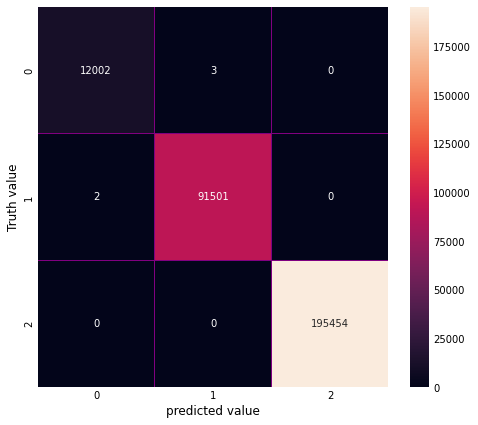

In [100]:
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=(7,7))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

In [101]:
labels_full=pd.get_dummies(df['target'], prefix='type')

In [102]:
labels=labels_full.values
labels

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [103]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [104]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [105]:
def create_nn_model():
    model = Sequential()
    model.add(Dense(10, input_dim=x_train_fs.shape[1], activation='relu'))
    model.add(Dense(40, input_dim=x_train_fs.shape[1], activation='relu'))
    model.add(Dense(10, input_dim=x_train_fs.shape[1], activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Dense(labels.shape[1],activation='softmax'))
    return model

In [106]:
model = create_nn_model()

In [107]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [108]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto')

In [109]:
history = model.fit(x_train_fs,y_train,validation_data=(x_test_fs,y_test),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
21800/21800 - 38s - loss: 0.0410 - val_loss: 9.6356e-04 - 38s/epoch - 2ms/step
Epoch 2/500
21800/21800 - 37s - loss: 0.0016 - val_loss: 8.7666e-04 - 37s/epoch - 2ms/step
Epoch 3/500
21800/21800 - 37s - loss: 0.0016 - val_loss: 8.9816e-04 - 37s/epoch - 2ms/step
Epoch 4/500
21800/21800 - 37s - loss: 0.0016 - val_loss: 8.8436e-04 - 37s/epoch - 2ms/step
Epoch 5/500
21800/21800 - 37s - loss: 0.0016 - val_loss: 8.3651e-04 - 37s/epoch - 2ms/step
Epoch 6/500
21800/21800 - 37s - loss: 0.0015 - val_loss: 8.2882e-04 - 37s/epoch - 2ms/step
Epoch 6: early stopping


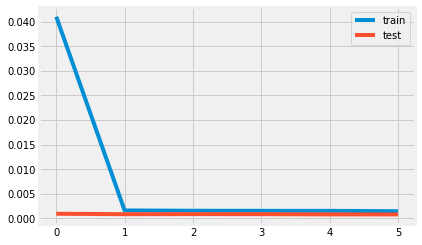

In [110]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [111]:
x_test.shape

(298962, 115)

In [112]:
y_pred = model.predict(x_test_fs)
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
nn_model1_accuracy = metrics.accuracy_score(y_eval, y_pred) * 100
print("accuracy: {}".format(nn_model1_accuracy))

accuracy: 99.98896180785518


In [113]:
y_pred

array([2, 2, 2, ..., 2, 1, 1])

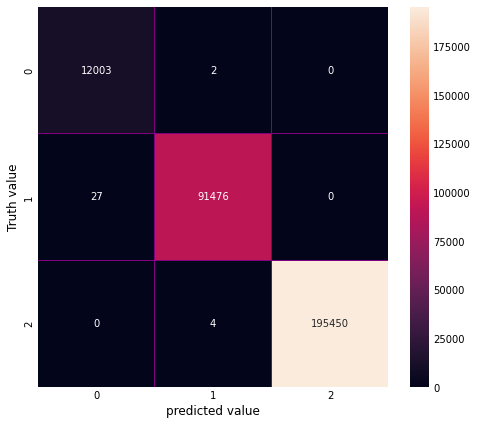

In [114]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

In [115]:
print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12005
           1       1.00      1.00      1.00     91503
           2       1.00      1.00      1.00    195454

    accuracy                           1.00    298962
   macro avg       1.00      1.00      1.00    298962
weighted avg       1.00      1.00      1.00    298962



In [116]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding='same', input_shape = (x_train_fs.shape[1], 1)))
    model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same'))
    model.add(LSTM(32, activation = 'relu', return_sequences=True))
    model.add(LSTM(16, return_sequences=True))  
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(labels.shape[1],activation='softmax'))
    return model

In [117]:
model = create_cnn_lstm_model()

In [118]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [119]:
history = model.fit(x_train_fs,y_train,validation_data=(x_test_fs,y_test),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
21800/21800 - 560s - loss: 0.0213 - val_loss: 0.0012 - 560s/epoch - 26ms/step
Epoch 2/500
21800/21800 - 521s - loss: 0.0056 - val_loss: 0.0039 - 521s/epoch - 24ms/step
Epoch 3/500
21800/21800 - 516s - loss: 0.0050 - val_loss: 0.0011 - 516s/epoch - 24ms/step
Epoch 4/500
21800/21800 - 509s - loss: 0.0402 - val_loss: 0.0023 - 509s/epoch - 23ms/step
Epoch 5/500
21800/21800 - 508s - loss: 0.0166 - val_loss: 0.0210 - 508s/epoch - 23ms/step
Epoch 6/500
21800/21800 - 501s - loss: 0.0238 - val_loss: 0.0011 - 501s/epoch - 23ms/step
Epoch 6: early stopping


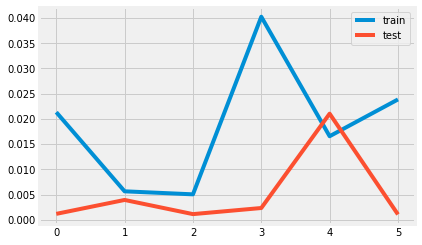

In [120]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [121]:
y_pred = model.predict(x_test_fs)
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
nn_model2_accuracy = metrics.accuracy_score(y_eval, y_pred) * 100
print("accuracy: {}".format(nn_model2_accuracy))

accuracy: 99.98595139181569


In [122]:
y_test.argmax(axis=1)

array([2, 2, 2, ..., 2, 1, 1])

In [123]:
y_pred

array([2, 2, 2, ..., 2, 1, 1])

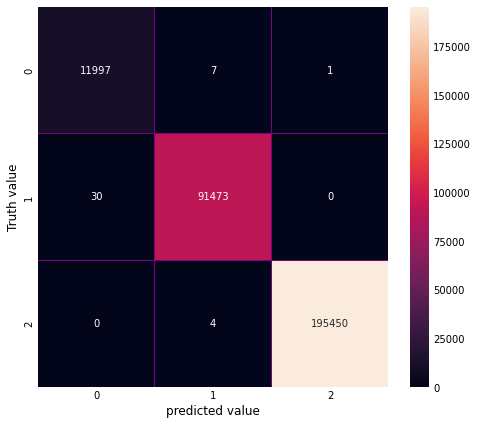

In [124]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

In [125]:
print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12005
           1       1.00      1.00      1.00     91503
           2       1.00      1.00      1.00    195454

    accuracy                           1.00    298962
   macro avg       1.00      1.00      1.00    298962
weighted avg       1.00      1.00      1.00    298962



In [126]:
accuracy_avg = (lr_accuracy *100 + rf_accuracy *100 + nn_model1_accuracy + nn_model2_accuracy) / 4

In [127]:
display(HTML("<h6 class='messagebox messagelightgreen'>All Models Accuracy Average is  <b>{0}</b></h6>".format(accuracy_avg)))